# Shapes on maps

You should import the packages that you need to run your code.

### 1. Flyover states

_[This is a continuation of the exercise done in class.]_

What states do you fly over and see when you fly from LA (airport code LAX) to NYC (airport code EWR)?

    LAX: 33.9425° N, 118.4081° W
    EWR: 40.6925° N, 74.1686° W

Steps:
1. Set up a Mercator projection and create a map
1. Plot states from Natural Earth
1. Plot the starting and ending locations
1. Find the flight path between by assuming it will follow the great circle distance. For this, use `pyproj` as shown in class. Add to plot.
1. Create a buffer around the flight path representing area that might be visible to you from the plane. Assume that you could see 100km on either side of the plane. Be sure to first convert your flight path into projected coordinates for this calculation. Add to plot.
1. Create a `shapely` linestring from your flight path and from the sight path (the buffer region).
1. Find intersections between the flight path and the state polygons and color these states differently in the plot.
1. Find intersections between the sight path and the state polygons and color these states differently in the plot.
1. Create and print out a list of the states that are either flown over or visible during the flight.

Be sure that your final map is clear, easy to read, and looks nice.

---

Grading rubric [19 points]:

* [2 pts] Set up projection successfully and create map
* [2 pts] Plot states and airport locations clearly
* [3 pts] Calculate great circle flight path and add to plot
* [3 pts] Create buffer region and add to plot
* [6 pts] Find intersections between flight and sight paths with states, and plot correctly
* [3 pts] Provide list of flown over or visible states

The visable states should be : ['Ariz.', 'Calif.', 'Colo.', 'Nev.', 'N.M.', 'Utah', 'Iowa', 'Kans.', 'Mo.', 'Nebr.', 'Conn.', 'Ill.', 'Ind.', 'Ohio', 'W.Va.', 'Del.', 'N.J.', 'N.Y.', 'Pa.', 'Mich.']


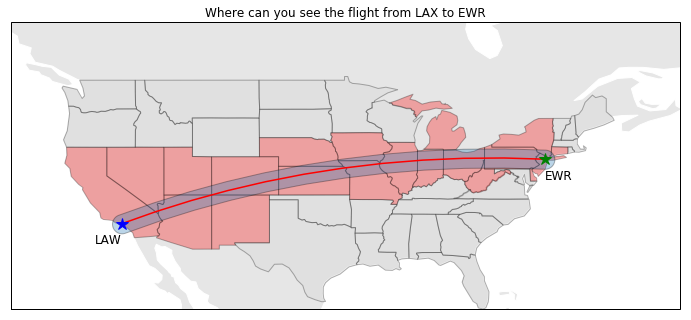

In [72]:
# YOUR CODE HERE
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import shapely.geometry
import shapely.ops
import cartopy
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs

proj = cartopy.crs.Mercator()
land_10m = cartopy.feature.NaturalEarthFeature('physical', 'land', '10m', edgecolor='face')


lon_lax, lat_lax = [-118.4081, 33.9425]
lon_ewr, lat_ewr = [-74.1686, 40.6925]

import pyproj  
g = pyproj.Geod(proj.proj4_init)
xygc = g.npts(lon_lax, lat_lax, lon_ewr, lat_ewr, 10)
xgc, ygc = zip(*xygc)
longc = [lon_lax]
longc.extend(xgc)
longc.extend([lon_ewr])
latgc = [lat_lax]
latgc.extend(ygc)
latgc.extend([lat_ewr]) 

flight_path = shapely.geometry.LineString(zip(longc,latgc))
flight_path_seen = flight_path.buffer(1)
fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot(111,projection=cartopy.crs.PlateCarree())
ax.add_feature(cartopy.feature.LAND, facecolor='0.9')
ax.add_feature(cartopy.feature.OCEAN, facecolor='w')
ax.set_extent([-130, -60, 25, 55], cartopy.crs.PlateCarree())

shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(category='cultural', resolution='110m', name=shapename)
reader = shpreader.Reader(states_shp)
states = reader.records()
visable_states = []

for state in states:
    if flight_path_seen.intersects(state.geometry):
        facecolor = 'r'
        visable_states.append(state.attributes['abbrev'])
    else:
        facecolor = 'lightgrey'
    ax.add_geometries([state.geometry], cartopy.crs.PlateCarree(),
                     facecolor=facecolor, edgecolor='k',alpha=0.3)
ax.add_geometries([flight_path.buffer(1)], cartopy.crs.PlateCarree(), edgecolor='black',alpha=0.3)
ax.plot(longc,latgc,'-r')
ax.set_title('Where can you see the flight from LAX to EWR')
ax.plot(lon_lax, lat_lax, '*', color='blue', ms=12, transform=ccrs.PlateCarree())
ax.text(lon_lax, lat_lax-1,'LAW', horizontalalignment='right',
        verticalalignment='top',
        transform=ccrs.PlateCarree(),fontsize=12)
ax.plot(lon_ewr, lat_ewr, '*', color='green', ms=12, transform=ccrs.PlateCarree())
ax.text(lon_ewr, lat_ewr-1,'EWR', horizontalalignment='left',
        verticalalignment='top',
        transform=ccrs.PlateCarree(),fontsize=12)
print("The visable states should be :", visable_states)

